In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [46]:
Ticker =  'TSLA'
stock_data = yf.Ticker(Ticker)

In [47]:
stock_data

yfinance.Ticker object <TSLA>

In [48]:
his_data = stock_data.history(period='max')

In [49]:
his_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-21 00:00:00-04:00,176.389999,178.179993,171.800003,172.820007,73178000,0.0,0.0
2024-03-22 00:00:00-04:00,166.690002,171.199997,166.300003,170.830002,75454700,0.0,0.0
2024-03-25 00:00:00-04:00,168.759995,175.240005,168.729996,172.630005,74228600,0.0,0.0


In [50]:
initial_investement = 1000


In [51]:
daily_returns = his_data['Close'].pct_change()

In [52]:
daily_returns.dropna()

Date
2010-06-30 00:00:00-04:00   -0.002511
2010-07-01 00:00:00-04:00   -0.078473
2010-07-02 00:00:00-04:00   -0.125683
2010-07-06 00:00:00-04:00   -0.160937
2010-07-07 00:00:00-04:00   -0.019243
                               ...   
2024-03-21 00:00:00-04:00   -0.016168
2024-03-22 00:00:00-04:00   -0.011515
2024-03-25 00:00:00-04:00    0.010537
2024-03-26 00:00:00-04:00    0.029195
2024-03-27 00:00:00-04:00    0.012157
Name: Close, Length: 3459, dtype: float64

In [53]:
wealth_over_time = initial_investement * ( 1 + daily_returns).cumprod()

In [54]:
wealth_over_time

Date
2010-06-29 00:00:00-04:00              NaN
2010-06-30 00:00:00-04:00       997.488522
2010-07-01 00:00:00-04:00       919.212869
2010-07-02 00:00:00-04:00       803.683372
2010-07-06 00:00:00-04:00       674.340595
                                 ...      
2024-03-21 00:00:00-04:00    108509.819757
2024-03-22 00:00:00-04:00    107260.339788
2024-03-25 00:00:00-04:00    108390.521471
2024-03-26 00:00:00-04:00    111555.020603
2024-03-27 00:00:00-04:00    112911.238622
Name: Close, Length: 3460, dtype: float64

In [55]:
utility_over_time = np.log(wealth_over_time)

In [56]:
data_0 = pd.DataFrame(utility_over_time)

In [57]:
data_0.dropna()

,Close
Date,
2010-06-30 00:00:00-04:00,6.905241
2010-07-01 00:00:00-04:00,6.823518
2010-07-02 00:00:00-04:00,6.689205
2010-07-06 00:00:00-04:00,6.513735
2010-07-07 00:00:00-04:00,6.494305
...,...
2024-03-21 00:00:00-04:00,11.594596
2024-03-22 00:00:00-04:00,11.583014
2024-03-25 00:00:00-04:00,11.593496


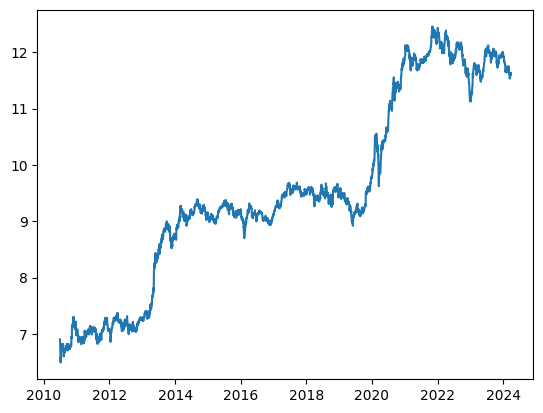

In [58]:
plt.plot(utility_over_time)

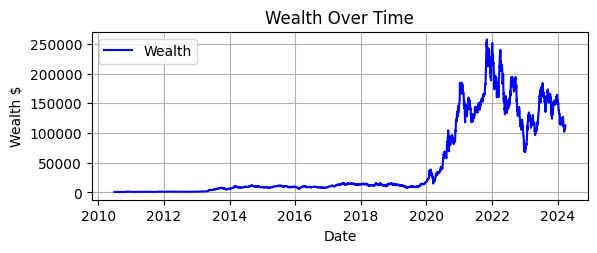

In [59]:
plt.subplot(2, 1, 1)
plt.plot(wealth_over_time.index, wealth_over_time, label='Wealth', color='Blue')
plt.title('Wealth Over Time')
plt.xlabel('Date')
plt.ylabel('Wealth $')
plt.grid(True)
plt.legend()

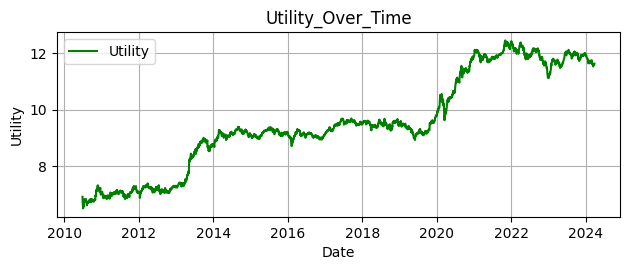

In [60]:
plt.subplot(2, 1, 2)
plt.plot(utility_over_time.index, utility_over_time, label='Utility', color='green')
plt.title('Utility_Over_Time')
plt.xlabel('Date')
plt.ylabel('Utility')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
expected_returns = daily_returns.mean()
std_deviation = daily_returns.std()

In [62]:
expected_returns

0.0020034231214727904

In [63]:
std_deviation

0.03575468517973564

In [64]:
def Utility(wealth):
    return np.log(wealth)

In [65]:
wealth_values = np.linspace(100, 1000, 100)

In [68]:
utility_values = Utility(wealth_values)

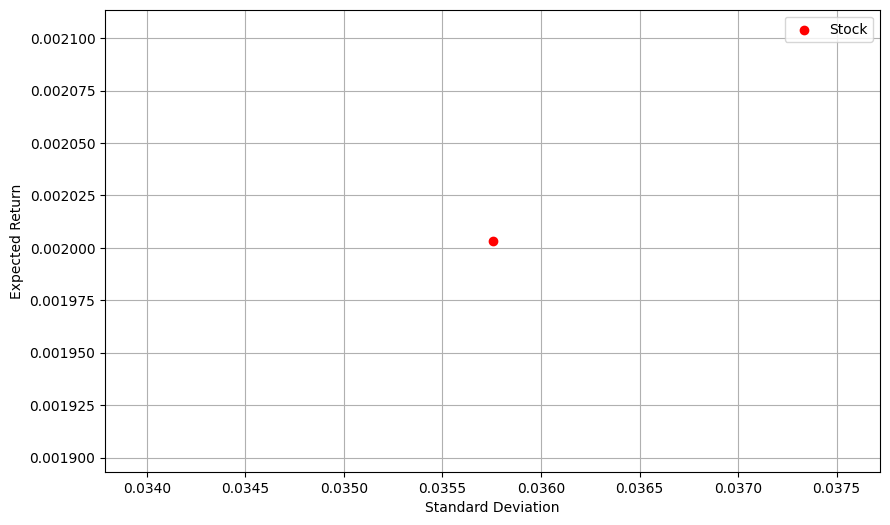

In [69]:
#Plot expected_return and std_deviation
plt.figure(figsize=(10, 6))
plt.scatter(std_deviation, expected_returns, color='red', label='Stock')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.grid(True)
plt.legend()

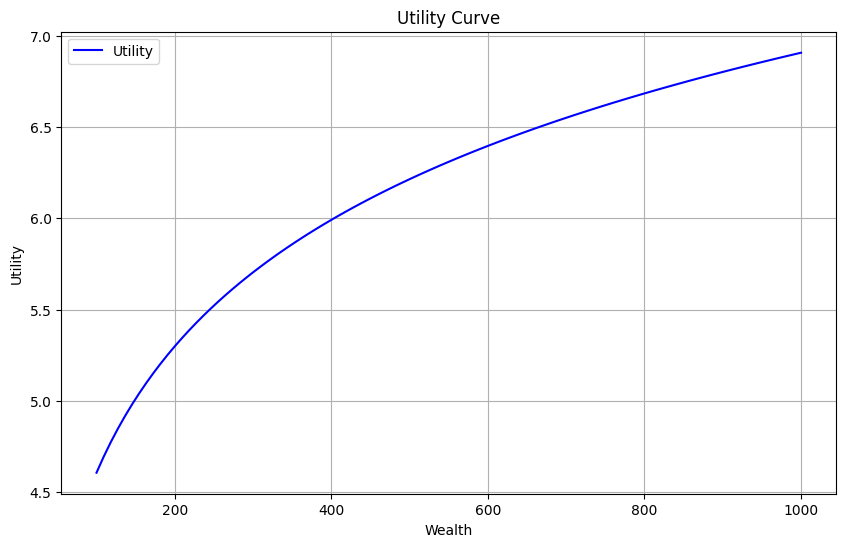

In [70]:
#Plot Utility Curve
plt.figure(figsize=(10, 6))
plt.plot(wealth_values, utility_values, color='blue', label='Utility')
plt.xlabel('Wealth')
plt.ylabel('Utility')
plt.title('Utility Curve')
plt.grid(True)
plt.legend()
plt.show()